# Multioutput Regression – Number of target variables greater than the number of features
## Mercury injection capillary pressure experiment
A study project to predict mercury injection capillary pressure (MICP) curve. The data set included a small number of features – well data, geology and lithology – and 200 target variables to be predicted, with a total of 455 data points.

# Detailed description of the assignment
The task is to build a multioutput regression model.

Target variables are ['bv_0', ..., 'bv_100', 'pc_0', ..., 'pc_100']

It is basically 2d data (pc_* - x axis, bv_* - y axis)

1.	Create baseline model of your choice. This should be a simple model (e. g. naive prediction) that can be used to compare the performance of more complex models
2.	Create a multioutput regression model to predict multiple outputs from a given dataset. This could be a linear regression model, a neural network, or any other suitable model
3.	Use appropriate techniques to preprocess the data, such as normalization, feature selection, and feature engineering
4.	Evaluate the performance of the model using appropriate metrics and cross-validation strategy. Use test data to come up with the strategy. Compare it to the baseline
5.	Tune the model's hyperparameters to optimize the model's performance (if needed)
6.	Visualize the results of the model predictions to provide insights into the data
7.	Suggest the improvements to the model. This should include any insights gained from the model and any recommendations for further improvements
8.	Provide a brief summary of the model and the results at the end of the Jupyter notebook (1 paragraph of text in English).

The dataset contains measurements and features related to core samples taken from different wells. The features include:

-	group - identifier of the well from which the core sample was taken 
-	sample - identifier of the core sample; all the data related to a particular well are recorded in one shot 
-	depth - depth at which the core sample was taken 
-	por - measured porosity of the core sample; porosity is the fraction of the volume of pores (empty spaces) to the total volume of the rock 
-	permeability - measured permeability of the core plug sample; permeability is a measure of the ability of a rock to allow fluids to pass through it 
-	den - measured density of the core plug sample; density is the mass per unit volume of the rock 
-	thickness_effective - effective (net) thickness of a formation from which the sample was taken 
-	ntg - net-to-gross ratio of a formation from which the sample was taken; NTG is the ratio of the thickness of reservoir rock to the thickness of the entire interval sampled 
-	x, y - well coordinates 
-	lithology - lithology of core plug sample, determined by a geologist; lithology refers to the physical and chemical characteristics of a rock, such as its mineral composition, texture, and color 
-	gr - measured gamma ray log of the sample depth; gamma ray log measures naturally occurring radioactivity of a formation, which is mainly used for determination of the shaliness of a formation. The values of gamma ray log will be low in clay-free rocks such as sandstones, limestones, dolostones, anhydrites, most salts, and coals, but high in shales because of high concentrations of radioactive material 
-	rhob - measured density log of the sample depth; density log is related to the bulk density of formation. It is used for determination of porosity and lithology differentiation. Measured density values will be closer to the mineralogical (matrix) density in formation with low porosity, and with an increase in porosity, density values will get lower 
-	ct_* - Data related to computer tomographic measurements 

# Domain knowledge
The first step before working with the data was to read some literature on the subject. A MICP experiment is performed by placing a prepared sample in a chamber with mercury. Mercury pressure is gradually increased to a maximum of 60,000 psi, forcing mercury into progressively smaller pores. The resulting curve of volume of mercury forced into the sample vs pressure is used to gain understanding of rock porosity and permeability.

This suggest that the pc_* variables are pressures and bv_* are the volumes of injected mercury. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv'); df

group  sample        depth        por       den         ct_1  \
0        3      52  1660.178974  18.556209  2.740942  1971.579998   
1        4      92  3890.779426   8.555400  2.834776  2513.180531   
2        3      90  2287.441253  -0.169935  2.761468  2274.773580   
3        3      49  2144.788740  28.192998  2.637605  1776.270868   
4        2      65  3754.453151   4.136069  2.900202  1787.771840   
..     ...     ...          ...        ...       ...          ...   
450      5      51  2097.045676  14.781216  2.688458  2455.839335   
451      5      35  2078.198020  19.385152  2.684518  2044.566279   
452      2      68  3672.405920  26.585923  2.772035  2040.649000   
453      5       6  2094.513127  16.977858  2.705836  2591.491630   
454      5      40  2083.348434  21.551898  2.698208  2759.357112   

            ct_2         ct_3         ct_4         ct_5  ...         pc_91  \
0    2396.714551  2799.219912  1951.977330  2041.857394  ...  20517.973164   
1    3001.782975  2348.160682  2414.636280  2798.706138  ...   4178.079326   
2    1083.899155  2974.647775  2713.863889  2381.094609  ...  20522.705605   
3    2374.721334  2670.367528  2814.751969  2919.311685  ...  20522.544570   
4    1893.016733  2818.411074  1542.522104  2246.952313  ...   4223.781546   
..           ...          ...          ...          ...  ...           ...   
450  2480.124636  2574.049871  2511.215039  2395.579990  ...  20522.071465   
451  2052.309283  2343.335254  2529.277934  2360.570479  ...  20515.948887   
452  2573.163502  1292.780567  2079.696767  2355.948265  ...   4384.635758   
453  2295.452470  2432.286576  2406.785838  2705.931007  ...  20522.289775   
454  2391.516056  2552.341865  2043.676110  2197.082350  ...  20521.270671   

            pc_92         pc_93         pc_94         pc_95         pc_96  \
0    23072.031367  25918.199746  29130.680234  32741.818105  36776.940391   
1     4564.280930   4987.905991   5457.903966   5976.209199   6537.572468   
2    23075.290605  25927.208926  29136.474492  32743.575156  36780.525273   
3    23075.227422  25928.721426  29137.418496  32742.759414  36779.554531   
4     4615.144614   5045.280631   5520.831567   6044.115860   6611.085441   
..            ...           ...           ...           ...           ...   
450  23074.956074  25926.207676  29135.754883  32743.289434  36780.388477   
451  23070.407505  25916.965068  29127.595225  32738.985176  36777.577871   
452   4792.584608   5241.195855   5734.702477   6275.782170   6869.952183   
453  23073.814199  25925.970928  29138.137822  32746.070488  36781.718086   
454  23074.265576  25929.970017  29137.153210  32746.966450  36791.815923   

            pc_97         pc_98         pc_99        pc_100  
0    41337.948828  46440.194570  52182.348633  58608.434023  
1     7149.014724   7826.130471   8559.884813   9368.567796  
2    41344.256875  46461.810508  52207.803164  58651.855859  
3    41344.410508  46463.711484  52212.429531  58661.142344  
4     7231.857753   7913.697529   8657.308785   9475.725759  
..            ...           ...           ...           ...  
450  41343.607969  46459.794961  52204.491289  58646.683398  
451  41334.507256  46434.336172  52175.582588  58596.777002  
452   7510.868407   8221.208958   8994.294442   9843.708743  
453  41348.267930  46455.386035  52207.608379  58647.802676  
454  41348.842178  46455.946401  52216.163403  58661.856567  

[455 rows x 222 columns]

In [3]:
test = pd.read_csv('test.csv'); test

group  sample        depth        por       den         ct_1         ct_2  \
0       6       0  2541.519832  17.574182  2.721184  2397.858599  2530.129882   
1       6       1  2492.499349  15.601646  2.731073  2493.479588  2381.180205   
2       6       2  2499.758962   9.799370  2.750291  2353.105272  2557.985901   
3       6       3  2484.952580  17.577824  2.644786  2577.886453  2405.878549   
4       6       4  2520.922067   7.463433  2.677037  2367.054324  2369.093221   
..    ...     ...          ...        ...       ...          ...          ...   
95      6      95  2506.465358  22.524565  2.717467  2226.799304  2322.424999   
96      6      96  2529.205503  16.489556  2.742124  2594.698631  2360.835565   
97      6      97  2495.466145  16.987957  2.729076  2198.629776  2274.317174   
98      6      98  2502.966218  16.563028  2.652266  2099.259496  2187.214693   
99      6      99  2518.018988  12.337637  2.689548  2424.247464  2363.588226   

           ct_3         ct_4         ct_5         ct_6         ct_7  \
0   2419.635540  2410.149830  2378.142534  2245.973152  2419.142862   
1   2374.025753  2122.706339  2535.031736  1926.894657  2213.529371   
2   2173.083377  2302.371534  2270.180822  2546.064601  2379.507012   
3   2541.314684  2433.153095  2541.348799  2471.677155  2431.742461   
4   2143.892103  2762.000785  2747.865591  2242.994301  2369.544989   
..          ...          ...          ...          ...          ...   
95  2321.583367  2368.146674  2351.404681  2300.565150  2436.607718   
96  2298.041687  2182.398798  2077.087326  2272.011368  2722.061215   
97  2385.930864  2548.291044  2397.159649  2342.184132  2214.495706   
98  2596.884331  2181.898479  2617.709264  2391.636223  2630.869557   
99  2104.416372  2710.264184  2202.022671  2285.667559  2526.155241   

    permeability       ntg  thickness_effective      x     y       lithology  \
0       9.686923  0.642302             8.331449  19250  4113       limestone   
1      25.113567  0.202864             6.434557  19250  4113  clay sandstone   
2      14.627389  0.493521             7.124782  19250  4113  clay sandstone   
3       3.387930  0.734310             7.613031  19250  4113       siltstome   
4      16.088282  0.753219             7.024979  19250  4113  clay sandstone   
..           ...       ...                  ...    ...   ...             ...   
95      6.304332  0.617321             7.860447  19250  4113  clay sandstone   
96      1.244887  0.084087             8.301461  19250  4113  clay sandstone   
97      9.122389  0.385367             7.315706  19250  4113  clay sandstone   
98      6.159614  0.322737             8.321823  19250  4113  clay sandstone   
99      6.091076  0.394281             5.211587  19250  4113  clay sandstone   

           gr      rhob  
0   38.502328  2.709270  
1   41.279069  2.629994  
2   34.065870  2.640400  
3   35.681114  2.624468  
4   32.158592  2.670718  
..        ...       ...  
95  33.301977  2.623144  
96  33.336088  2.758480  
97  39.686841  2.617072  
98  38.414041  2.777879  
99  37.502388  2.711414  

[100 rows x 20 columns]

In [4]:
df.dtypes

group       int64
sample      int64
depth     float64
por       float64
den       float64
           ...   
pc_96     float64
pc_97     float64
pc_98     float64
pc_99     float64
pc_100    float64
Length: 222, dtype: object

# Variables
An analysis of each variable.

Scroll down to the bottom for the most interesting ones: pressure and volume.

In [5]:
df.columns.to_list()

['group',
 'sample',
 'depth',
 'por',
 'den',
 'ct_1',
 'ct_2',
 'ct_3',
 'ct_4',
 'ct_5',
 'ct_6',
 'ct_7',
 'permeability',
 'ntg',
 'thickness_effective',
 'x',
 'y',
 'lithology',
 'gr',
 'rhob',
 'bv_0',
 'bv_1',
 'bv_2',
 'bv_3',
 'bv_4',
 'bv_5',
 'bv_6',
 'bv_7',
 'bv_8',
 'bv_9',
 'bv_10',
 'bv_11',
 'bv_12',
 'bv_13',
 'bv_14',
 'bv_15',
 'bv_16',
 'bv_17',
 'bv_18',
 'bv_19',
 'bv_20',
 'bv_21',
 'bv_22',
 'bv_23',
 'bv_24',
 'bv_25',
 'bv_26',
 'bv_27',
 'bv_28',
 'bv_29',
 'bv_30',
 'bv_31',
 'bv_32',
 'bv_33',
 'bv_34',
 'bv_35',
 'bv_36',
 'bv_37',
 'bv_38',
 'bv_39',
 'bv_40',
 'bv_41',
 'bv_42',
 'bv_43',
 'bv_44',
 'bv_45',
 'bv_46',
 'bv_47',
 'bv_48',
 'bv_49',
 'bv_50',
 'bv_51',
 'bv_52',
 'bv_53',
 'bv_54',
 'bv_55',
 'bv_56',
 'bv_57',
 'bv_58',
 'bv_59',
 'bv_60',
 'bv_61',
 'bv_62',
 'bv_63',
 'bv_64',
 'bv_65',
 'bv_66',
 'bv_67',
 'bv_68',
 'bv_69',
 'bv_70',
 'bv_71',
 'bv_72',
 'bv_73',
 'bv_74',
 'bv_75',
 'bv_76',
 'bv_77',
 'bv_78',
 'bv_79',
 'bv_80',

## Group
Sample groups which are actually well numbers.

In [6]:
df.group.unique()

array([3, 4, 2, 5, 0, 1], dtype=int64)

In [7]:
test.group.unique()

array([6], dtype=int64)

## Sample

In [8]:
df['sample'].nunique()

100

In [9]:
df['sample'].unique()

array([52, 92, 90, 49, 65, 28, 74, 39, 41, 37, 50, 62, 14, 66, 33, 88, 45,
       34, 84, 22,  1, 32, 59, 68, 30, 86, 13,  2, 97, 61, 24, 76, 43, 47,
       51, 38, 96, 26, 67, 75, 72, 11, 93, 57, 10, 78, 98, 69, 94,  9, 27,
       85, 71, 64, 48, 81, 23, 79, 63,  3,  7, 83, 80, 77, 54, 95, 17, 82,
       70, 29, 73, 91,  5, 87, 12,  0, 55,  8, 42, 53,  4, 25, 35, 21, 44,
       40, 18, 36, 15,  6, 16, 46, 56, 58, 31, 89, 20, 19, 99, 60],
      dtype=int64)

In [10]:
test['sample'].nunique()

100

In [11]:
test['sample'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

The _sample_ variable is sample number. Sample numbers are the same in the train and test set, with the difference in group numbers. According to the provided data description, group is well number so matching sample numbers in different wells do not imply any relationship whatsoever. Drop the sample column.

In [12]:
df.groupby('sample').agg({'group': 'count'})

group
sample       
0           3
1           5
2           5
3           5
4           2
...       ...
95          4
96          5
97          5
98          5
99          3

[100 rows x 1 columns]

## X and y

In [13]:
coordinates_train = df.groupby(['x', 'y'], as_index=False).size()
coordinates_train['color'] = 'green'
coordinates_test = test.groupby(['x', 'y'], as_index=False).size()
coordinates_test['color'] = 'red'
coordinates = pd.concat([coordinates_train, coordinates_test])
coordinates

x     y  size  color
0  16169  5288    79  green
1  16790  3644    69  green
2  17349  3782    77  green
3  18985  5423    73  green
4  19850  3873    76  green
5  20022  3497    81  green
0  19250  4113   100    red

<AxesSubplot:xlabel='x', ylabel='y'>

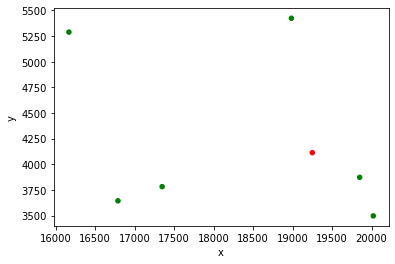

In [14]:
coordinates.plot.scatter('x', 'y', c='color')

X and y are the coordinates of wells (well no. = group), green points for the train set wells and the single red point for the test well set. Do we need to take well proximity into account?

## Por (porosity), den (density) and permeability

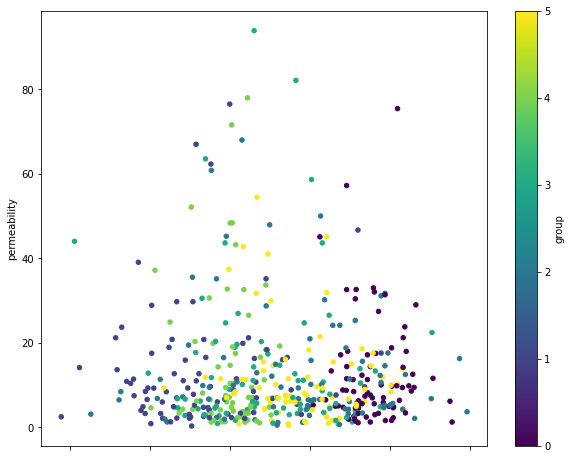

In [15]:
df.plot.scatter('por', 'permeability', c='group', figsize=(10,8), colormap='viridis');

## Depth
There are two separate depth intervals:

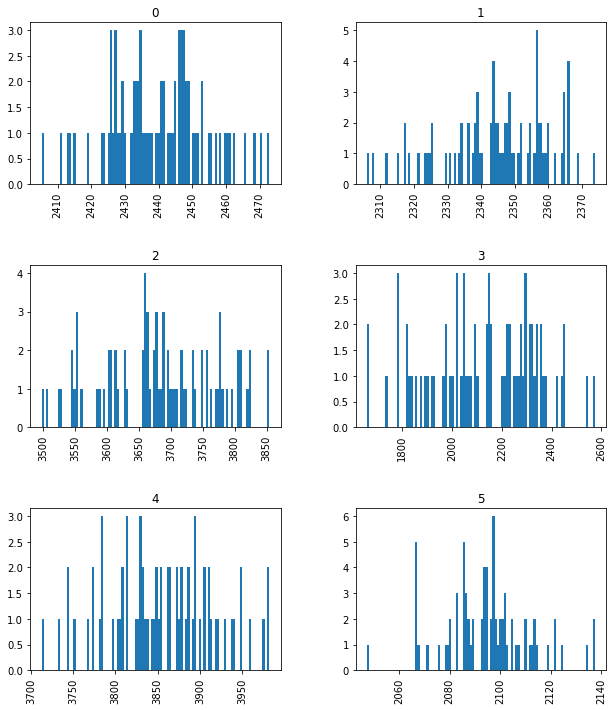

In [16]:
df.hist(column='depth', bins=100, by='group',figsize=(10, 12));

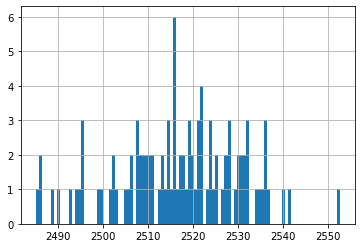

In [17]:
test.depth.hist(bins=100);

The test points were taken from the upper interval only.

## ntg (net to gross)

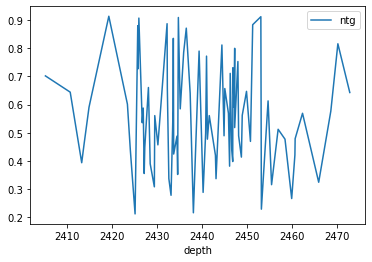

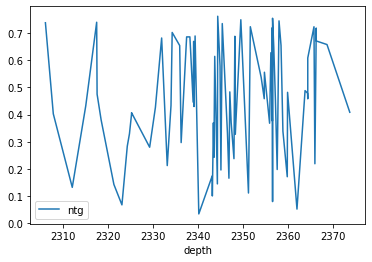

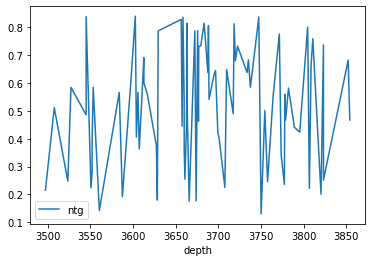

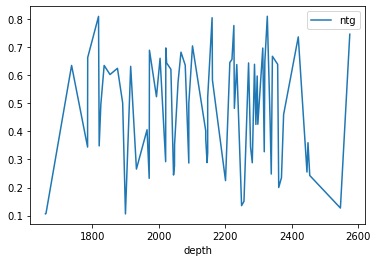

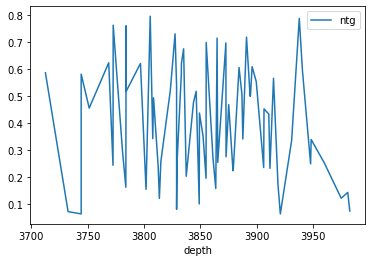

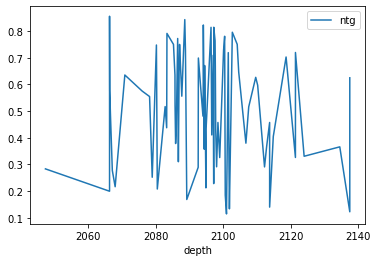

In [18]:
df.sort_values(by='depth') \
    .groupby('group') \
    .plot.line(x='depth', y='ntg');

## Thickness

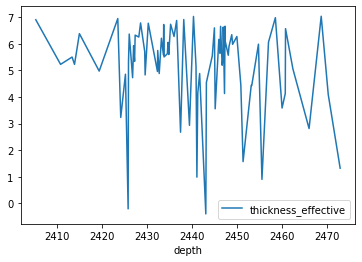

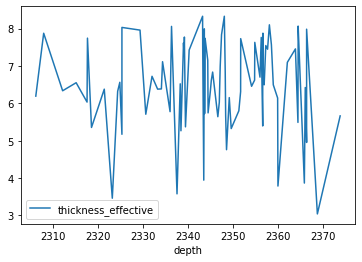

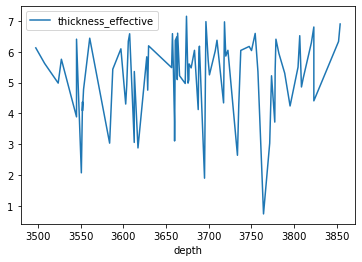

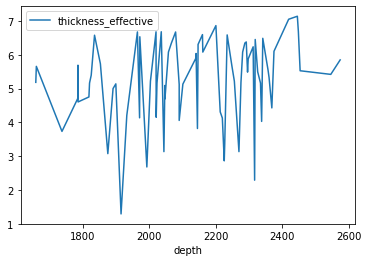

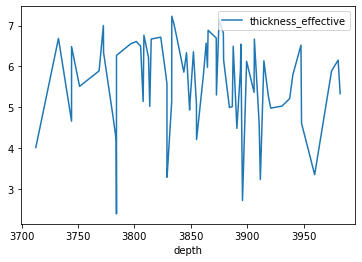

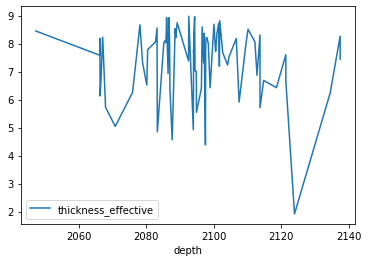

In [19]:
df.sort_values(by='depth') \
    .groupby('group') \
    .plot.line(x='depth', y='thickness_effective');

## Lithology

In [20]:
df.lithology.unique()

array(['limestone', 'shale', 'sandstone', 'siltstome', 'clay sandstone'],
      dtype=object)

## gr (gamma ray)

In [21]:
df.gr.describe()

count    455.000000
mean      37.499362
std        9.413786
min      -11.531345
25%       34.203722
50%       40.042615
75%       43.689289
max       51.735349
Name: gr, dtype: float64

## rhob (density log)

In [22]:
df.rhob.describe()

count    455.000000
mean       2.628022
std        0.101322
min        2.248610
25%        2.571717
50%        2.646557
75%        2.705534
max        2.815049
Name: rhob, dtype: float64

## pc and bv
Assuming pc is pressure and bv is the volume of injected mercury.

### The first 10 pressure curves
(pressure values only, without volume)

                 pc
count    101.000000
mean    5269.984443
std    11711.440019
min        0.535189
25%        9.260155
50%      169.000166
75%     3169.923860
max    58608.434023


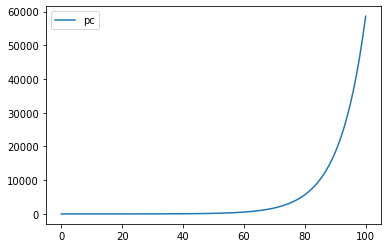

                pc
count   101.000000
mean   1078.674825
std    2039.692838
min       0.908788
25%       9.857963
50%     102.970923
75%     992.749482
max    9368.567796


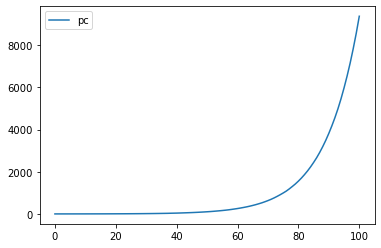

                 pc
count    101.000000
mean    5271.312836
std    11716.080347
min        0.531813
25%        9.255980
50%      168.754294
75%     3169.985420
max    58651.855859


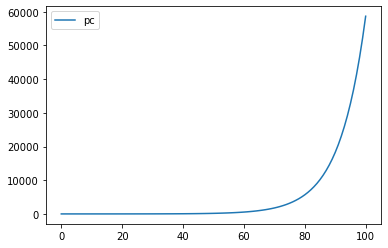

                 pc
count    101.000000
mean    5271.427420
std    11716.731581
min        0.530184
25%        9.254550
50%      168.811177
75%     3170.067644
max    58661.142344


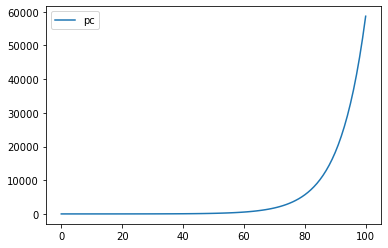

                pc
count   101.000000
mean   1090.602186
std    2062.916936
min       0.908399
25%       9.858103
50%     103.937779
75%    1002.193063
max    9475.725759


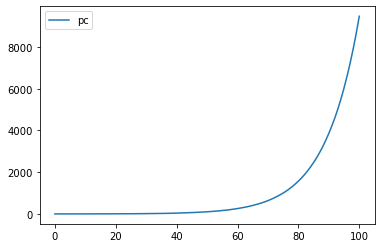

                pc
count   101.000000
mean   1051.739820
std    1988.886461
min       0.910964
25%       9.858426
50%     100.287880
75%     969.161794
max    9134.799864


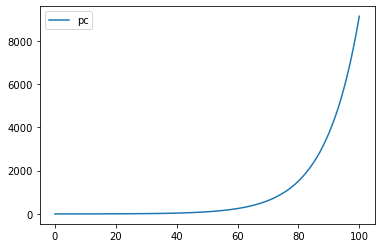

                 pc
count    101.000000
mean    1160.926563
std     2196.105571
min        0.908343
25%        9.858014
50%      111.184099
75%     1066.248139
max    10089.739167


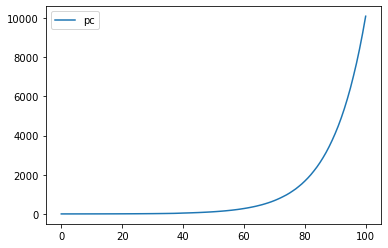

                pc
count   101.000000
mean   1104.066085
std    2087.909340
min       0.908422
25%       9.857907
50%     105.561917
75%    1015.345097
max    9591.150337


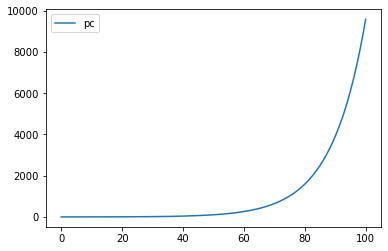

                 pc
count    101.000000
mean    5273.084692
std    11722.351188
min        0.531690
25%        9.254858
50%      169.721464
75%     3171.923206
max    58708.051006


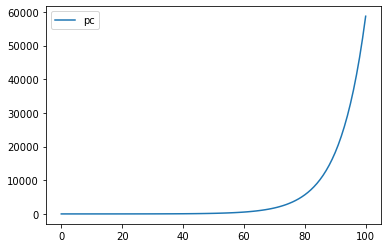

                 pc
count    101.000000
mean    5269.407953
std    11711.105713
min        0.531970
25%        9.256744
50%      169.362581
75%     3167.816563
max    58603.439948


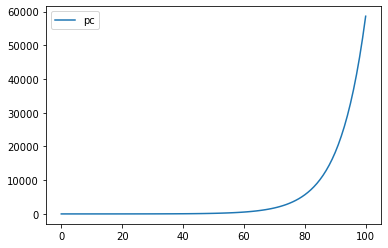

In [23]:
for i in range(10):
    pressures = pd.DataFrame({'pc':df.filter(regex='^pc_').iloc[i,:].to_list()})
    print(pressures.describe())
    pressures.plot.line(y='pc')
    plt.show();

Trying logarithmic scale:

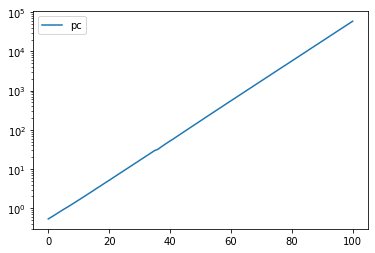

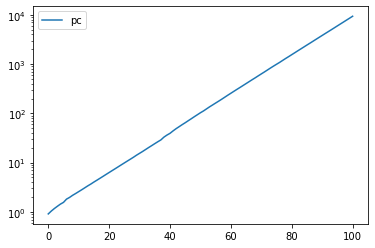

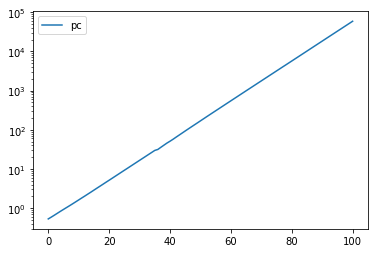

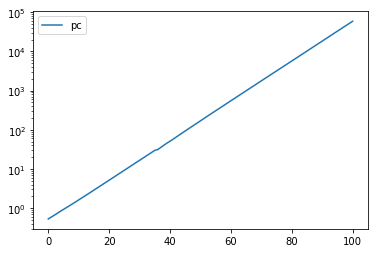

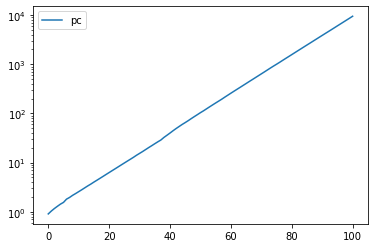

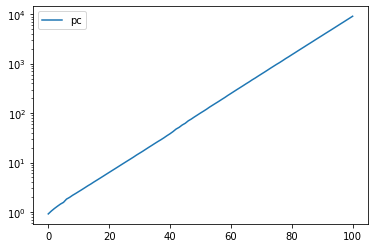

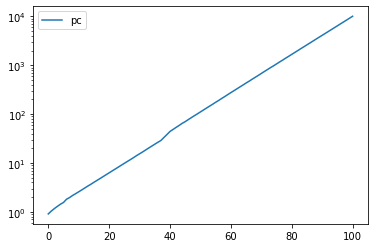

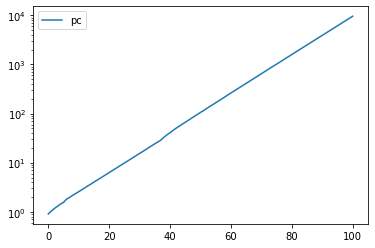

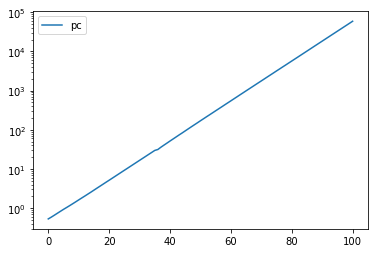

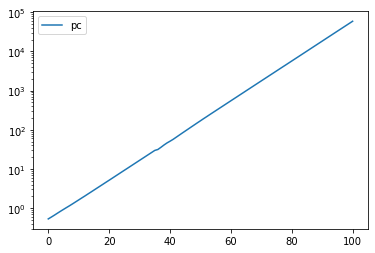

In [24]:
for i in range(10):
    pd.DataFrame({'pc':df.filter(regex='^pc_').iloc[i,:].to_list()}) \
    .plot.line(y='pc', logy=True);

Pressure is increased logarithmically!

### Volume vs pressure
The first 10 curves. (In literature, volume is usually plotted vs pressure, but in this case, the assignment says that pressure is the x axis.)

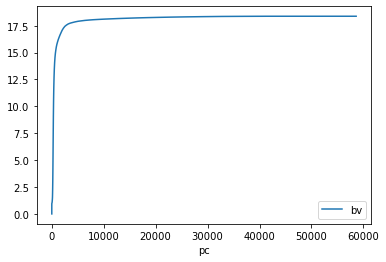

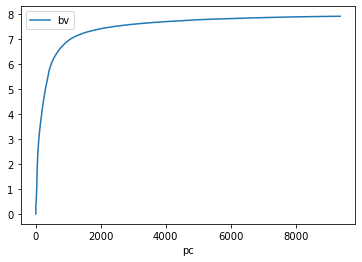

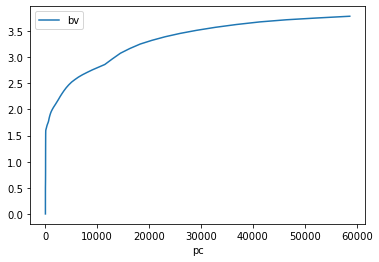

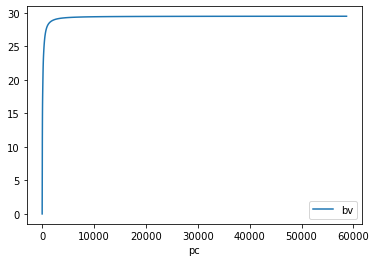

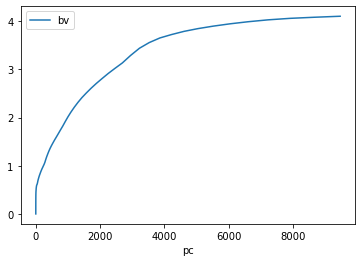

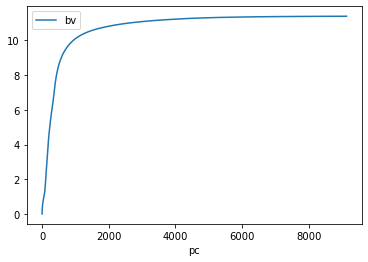

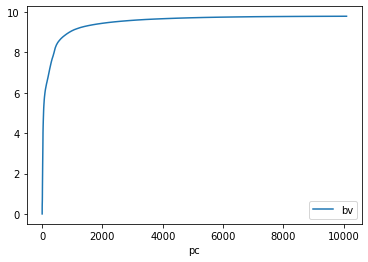

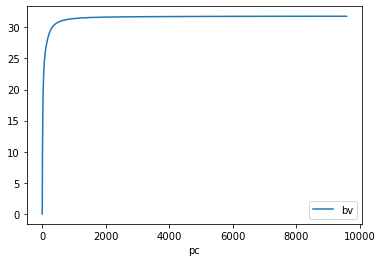

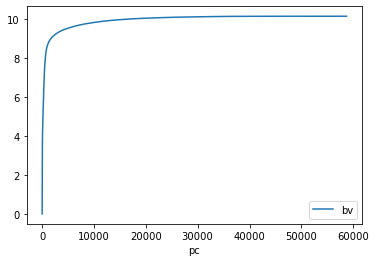

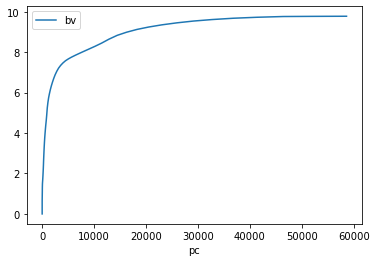

In [26]:
for i in range(10):
    pd.DataFrame({'bv':df.filter(regex='^bv_').iloc[i,:].to_list(),
             'pc':df.filter(regex='^pc_').iloc[i,:].to_list()}) \
    .plot.line('pc', 'bv', logx=False);

The same curves with pressure on a log scale.

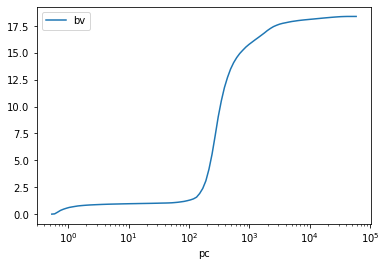

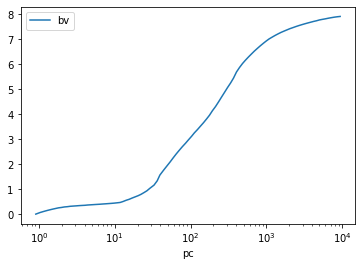

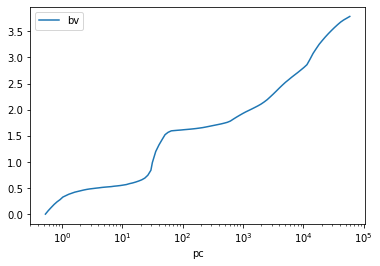

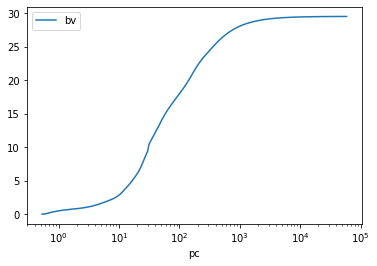

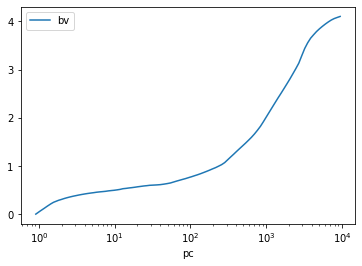

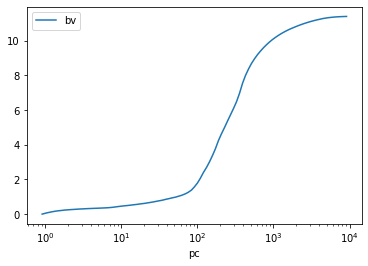

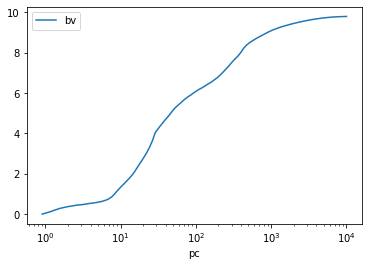

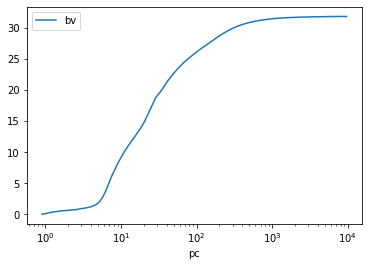

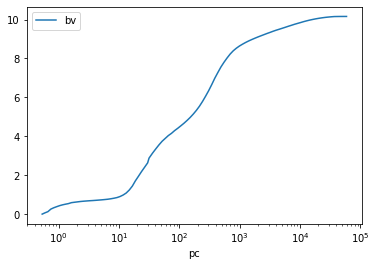

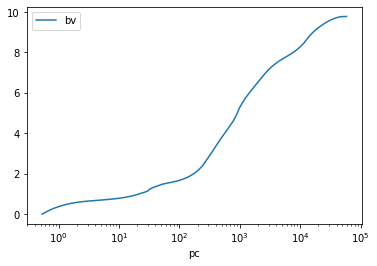

In [28]:
for i in range(10):
    pd.DataFrame({'bv':df.filter(regex='^bv_').iloc[i,:].to_list(),
             'pc':df.filter(regex='^pc_').iloc[i,:].to_list()}) \
    .plot.line('pc', 'bv', logx=True);

### Ranges of pressure and volume

In [29]:
volumes = df.filter(regex='^bv_')

In [30]:
volumes.min().min(), volumes.max().max()

(8.15602376270127e-30, 36.02944911571249)

In [31]:
pressures = df.filter(regex='^pc_')

In [32]:
pressures.min().min(), pressures.max().max()

(0.5104587300675726, 58717.46956054687)

In [33]:
import numpy as np

In [34]:
log_pressures = pressures.apply(np.log)

In [35]:
log_pressures.min().min(), log_pressures.max().max()

(-0.6724454868244157, 10.980492569044916)

Ranges are a few orders of magnitude wide so it probably makes sense to use logarithms in regression.

### Restoring pressure values from endpoints assuming pressure is increased logarithmically
In real life, I believe the task should be to predict injected volumes from pressure (and other features), so pressure values should be considered independent variables (we can simply use the range from 0 to 60,000 psi which is the max pressure used in experiments) and only volumes should be predicted.

So I am checking whether knowing only the endpoints is enough to calculate all pressure values for one sample.

In [36]:
import math, numpy as np

In [37]:
p = pd.DataFrame({'actual':df.filter(regex='^pc_').iloc[0,:]})
p

actual
pc_0        0.535189
pc_1        0.595750
pc_2        0.665606
pc_3        0.745420
pc_4        0.835103
...              ...
pc_96   36776.940391
pc_97   41337.948828
pc_98   46440.194570
pc_99   52182.348633
pc_100  58608.434023

[101 rows x 1 columns]

In [38]:
logmin = math.log(p.iloc[0, 0])
logmax = math.log(p.iloc[100, 0])

In [39]:
p['pred_log'] = np.linspace(logmin, logmax, num=101, endpoint=True)

In [40]:
p['pred'] = p['pred_log'].apply(math.exp)

In [41]:
p

actual   pred_log          pred
pc_0        0.535189  -0.625135      0.535189
pc_1        0.595750  -0.509098      0.601038
pc_2        0.665606  -0.393060      0.674988
pc_3        0.745420  -0.277022      0.758038
pc_4        0.835103  -0.160985      0.851305
...              ...        ...           ...
pc_96   36776.940391  10.514483  36845.291626
pc_97   41337.948828  10.630521  41378.670065
pc_98   46440.194570  10.746559  46469.827236
pc_99   52182.348633  10.862596  52187.391232
pc_100  58608.434023  10.978634  58608.434023

[101 rows x 3 columns]

<AxesSubplot:xlabel='actual', ylabel='pred'>

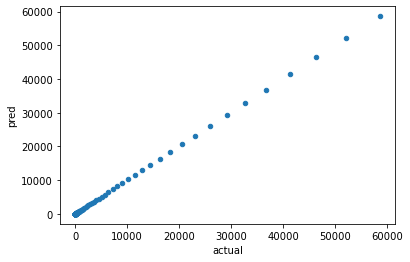

In [42]:
p.plot.scatter('actual', 'pred')

<AxesSubplot:>

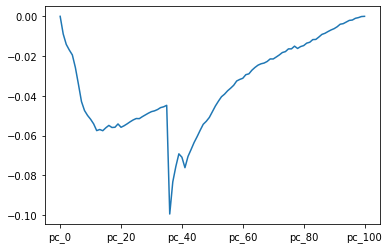

In [43]:
((p.actual - p.pred) / p.actual).plot.line()

In [44]:
p.iloc[30:40,:]

actual  pred_log       pred
pc_30  16.596741  2.855995  17.391740
pc_31  18.645807  2.972033  19.531588
pc_32  20.953214  3.088071  21.934720
pc_33  23.552964  3.204108  24.633528
pc_34  26.461240  3.320146  27.664393
pc_35  29.737991  3.436184  31.068171
pc_36  31.737385  3.552222  34.890742
pc_37  36.173340  3.668259  39.183637
pc_38  40.915044  3.784297  44.004721
pc_39  46.224116  3.900335  49.418982

Max relative error = 10%, which confirms my hypothesis that pressure values in the experiments were the independent variables increased by equal increments on a log scale.